# Multinomial Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Multinomial Logistic Regression

This is logistic regression when number of classes are more than 2.

## Implementation

The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $\mathbf{X}$ and $\mathbf{Y}$ and $\mathbf{W}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{Y}$ -> $(m, k)$
        - $\mathbf{W}$ -> $(n, k)$
        - where $k$ is number of classes
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict using the softmax function
   $$ h = P(y = c \mid \boldsymbol{\theta}) = \frac{e^{\boldsymbol{\theta}^{T}_c\mathbf{x}}}{\Sigma_{i=1}^{k} e^{\boldsymbol{\theta}_k^{T}\mathbf{x}}}$$
   where c is the class
   
   --->why this function?<----
   - First, mathematically, this is just an extension of the sigmoid formula for multi-class classification
   - $e$ will always give non-negative outputs which helps, since probability is never negative
   - $e$ has a similar effect as argmax, which will turn larger input to larger outputs.
   - $e$ is super easy to differentiate, because derivative of $e$ is $e$
   - $e$ nicely cancel out the $\log$ in the cross entropy loss (see below)
   - By dividing, it make sure all the probability adds up to one.  You can think the softmax function as some form of normalization.   Why not normalization?  Because normalization cares only about proportion, while softmax reacts to change in scale better.

## Softmax function

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

X = np.array([[1, 2, 3],
             [2, 4, 5]])

print("X: ", X.shape)  #(m, n) two samples, three features.  We ignore the y-intercept

#####important########
#note that Y in a multi-class classification is one-hot NOT class label
Y = np.array([[0, 0, 1, 0],
              [1, 0, 0, 0]])  #(m, k) let's say four classes

print("Y: ", Y.shape)

W = np.array([[1, 2, 3, 4],
              [2, 3, 1, 0],
              [1, 2, 5, 1],
              ])  #(n, k)  three features, four classes

print("W: ", W.shape)

print("X @ W:",  X @ W)  #X @ W should be the same shape as our y

print("softmax(X @ W):", softmax(X@W))

np.set_printoptions(suppress=True)
print("Try to confirm it adds up to 1:", softmax(X@W).sum(axis=1))

print("if I want to know which one is the answer, use argmax: ", np.argmax(softmax(X@W), axis=1))

X:  (2, 3)
Y:  (2, 4)
W:  (3, 4)
X @ W: [[ 8 14 20  7]
 [15 26 35 13]]
softmax(X @ W): [[6.12896865e-06 2.47260243e-03 9.97519014e-01 2.25472156e-06]
 [2.06089928e-09 1.23394576e-04 9.99876603e-01 2.78912388e-10]]
Try to confirm it adds up to 1: [1. 1.]
if I want to know which one is the answer, use argmax:  [2 2]


## Cross entropy loss

3. Calculate the loss using the cross entropy loss
    $$J = -\sum_{i=1}^m y^{(i)}\log(h^{(i)})$$
    
Note that this is no different with the previous binary cross entropy loss.  The binary cross entropy loss is now simply extended to multiclass

In [3]:
print("Y: ", Y)
print("h: ", softmax(X@W))
print("log: ", Y * np.log(softmax(X@W)))
print("log loss: ", -(Y * np.log(softmax(X@W))))
print("sum of log loss: ", np.sum(-(Y * np.log(softmax(X@W)))))

Y:  [[0 0 1 0]
 [1 0 0 0]]
h:  [[0.00000613 0.0024726  0.99751901 0.00000225]
 [0.         0.00012339 0.9998766  0.        ]]
log:  [[ -0.          -0.          -0.00248407  -0.        ]
 [-20.0001234   -0.          -0.          -0.        ]]
log loss:  [[ 0.          0.          0.00248407  0.        ]
 [20.0001234   0.          0.          0.        ]]
sum of log loss:  20.00260747339262


## Gradient

4. Calculate the gradient of theta of feature $j$ based on the loss function $J$
    - Suppose given 2 classes (k = 2) and 3 features (n = 3), first, our y will have shape of (sample, 2), where $y_1$ refers to the probability of the sample belonging to class 1, and $y_2$ is the probability of the sample belonging to class 2.  Here $y$ sums to 1.  We have the loss function as
       $$ J = -y_1 \log h_1 - y_2 \log h_2 $$
       where $h_1$ and $h_2$ are
       $$ h_1 = \frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)} $$
       $$ h_2 = \frac{\exp(g_2)}{\exp(g_1)+\exp(g_2)} $$
       where $g_1$ and $g_2$ are
       $$ g_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3 $$
       $$ g_2 = w_{12}x_1 + w_{22}x_2 + w_{32}x_3  $$
       where in $w_{ij}$, $i$ stands for feature and $j$ stands for class 
    - For example, to find the gradient of $J$ in respect to $w_{21}$, we simply can use the chain rule (or backpropagation) to calculate like this:
       $$ \frac{\partial J}{\partial w_{21}} = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}$$
   - If we know each of them, it is easy, where
       $$\frac{\partial J}{\partial h_{1}} = -\frac{y_1}{h_1}$$
       $$\frac{\partial J}{\partial h_{2}} = -\frac{y_2}{h_2}$$
       $$\frac{\partial h_{1}}{\partial g_{1}} = \frac{\exp(g_{1})}{\exp(g_{1}) + \exp(g_{2})} - (\frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)})^2 = h_1 (1 - h_1)$$
       $$\frac{\partial h_{2}}{\partial g_{1}} = \frac{-exp(g_2)exp(g_1)}{(\exp(g_1) + \exp(g_2)^2} = -h_2h_1$$
       $$\frac{\partial g_1}{\partial w_{21}} = x_2$$
    - For those who forgets how to do third and fourth, recall that the quotient rule
        $$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$
    - Putting everything together, we got
        $$
        \begin{aligned}
        \frac{\partial J}{\partial w_{21}} &= \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}\\
        &= -\frac{y_1}{h_1} * h_1 (1 - h_1) * x_2 + -\frac{y_2}{h_2} * -h_2h_1 * x_2 \\
        &= x_2 (-y_1 + y_1h_1 + y_2h_1)\\
        &= x_2 (-y_1 + h_1(y_1 + y_2))\\
        &= x_2 (h_1 - y_1)\\
        \end{aligned}
        $$
     
    - Putting into matrix form, we get
        $$ \frac{\partial J}{\partial \theta} = \mathbf{X}^\top (\mathbf{H} - \mathbf{Y})$$
    - Note that both $\mathbf{H}$ and $\mathbf{Y}$ are matrices, not vectors.

5. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
6. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

**Note: Again, take it easy if you don't understand the derivative.  One good news is that the gradient turns out to be the same as past lesson!**

## Putting everything together

In [4]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "st123131-a3"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="st123131-a3")



2023/09/19 18:20:26 INFO mlflow.tracking.fluent: Experiment with name 'st123131-a3' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/619362096066737525', creation_time=1695122426101, experiment_id='619362096066737525', last_update_time=1695122426101, lifecycle_stage='active', name='st123131-a3', tags={}>

In [5]:
# #experiment tracking
# import mlflow
# import os
# # This the dockerized method.
# # We build two docker containers, one for python/jupyter and another for mlflow.
# # The url `mlflow` is resolved into another container within the same composer.
# mlflow.set_tracking_uri("http://localhost:5000")
# # In the dockerized way, the user who runs this code will be `root`.
# # The MLflow will also log the run user_id as `root`.
# # To change that, we need to set this environ["LOGNAME"] to your name.
# os.environ["LOGNAME"] = "pooh"
# # mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
# mlflow.set_experiment(experiment_name="pooh-regularization-experiments")

### I load preprocessed datasets from previous assignment 

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


df_train = pd.read_csv("datasets/car_train.csv")
df_test = pd.read_csv("datasets/car_test.csv")

In [7]:
df_train.columns

Index(['engine', 'max_power', 'mileage', 'year', 'selling_price'], dtype='object')

In [8]:
df_train.describe()

,engine,max_power,mileage,year,selling_price
count,5619.000000,5619.000000,5619.000000,5619.000000,5.619000e+03
mean,1461.849795,92.312496,19.373770,2013.858694,6.525876e+05
std,505.220996,36.073644,4.007377,3.977728,8.197449e+05
min,624.000000,0.000000,0.000000,1994.000000,3.000000e+04
25%,1197.000000,69.000000,16.800000,2012.000000,2.650000e+05
50%,1248.000000,83.800000,19.373770,2015.000000,4.500000e+05
75%,1582.000000,102.000000,22.300000,2017.000000,7.000000e+05
max,3604.000000,400.000000,42.000000,2020.000000,1.000000e+07


In [9]:
bin_edges = [0, 250000, 500000, 750000, 99999999]
bin_labels = [0, 1, 2, 3]
df_train['selling_price_level'] = pd.cut(df_train['selling_price'], bins=bin_edges, labels=bin_labels)
df_test['selling_price_level'] = pd.cut(df_test['selling_price'], bins=bin_edges, labels=bin_labels)
df_train = df_train.drop(columns=['selling_price'])
df_test = df_test.drop(columns=['selling_price'])

In [10]:
df_train[:5]

,engine,max_power,mileage,year,selling_price_level
0,2179,140.0,15.10,2014,3
1,1248,74.0,23.40,2014,1
2,999,67.0,23.01,2017,1
3,1969,190.0,18.00,2019,3
4,814,55.2,21.10,2014,0


In [11]:
df_train['selling_price_level'].value_counts()

selling_price_level
1    1818
2    1366
0    1349
3    1086
Name: count, dtype: int64

In [12]:
X_train = df_train.iloc[:,:-1]
X_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
y_test = df_test.iloc[:,-1]

In [13]:
y_train[:5]

0    3
1    1
2    1
3    3
4    0
Name: selling_price_level, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

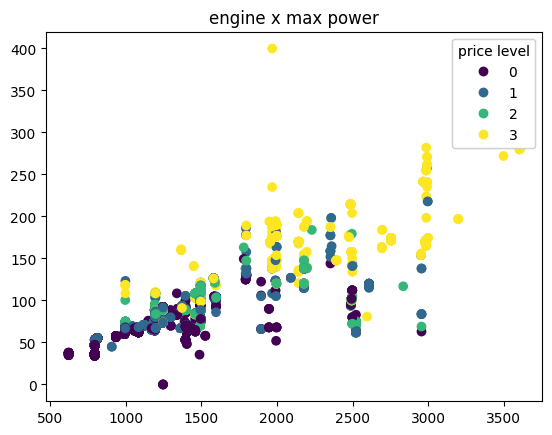

<Figure size 600x600 with 0 Axes>

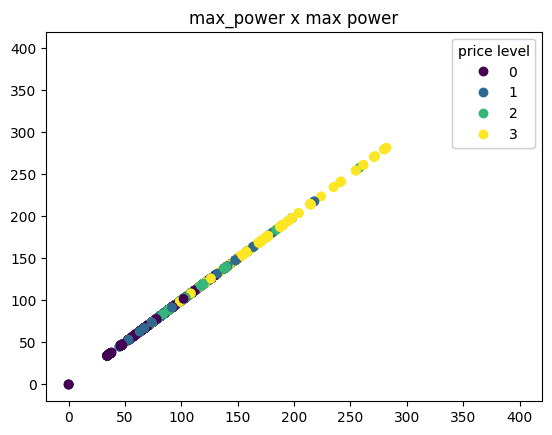

<Figure size 600x600 with 0 Axes>

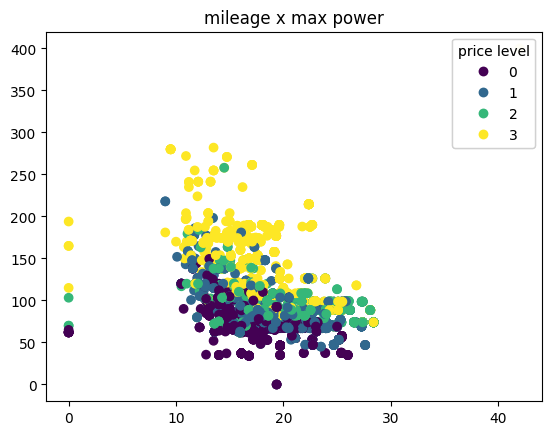

<Figure size 600x600 with 0 Axes>

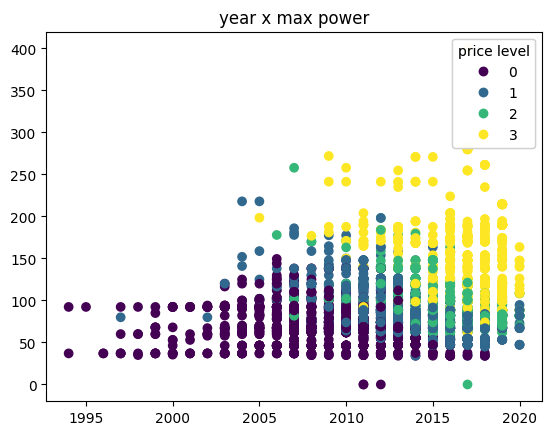

<Figure size 600x600 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Visualize our data
for feature in X_train.columns:
    fig, ax = plt.subplots()
    plt.title(f"{feature} x max power")
    plt.figure(figsize=(6,6))
    scatter = ax.scatter(X_train[feature], X_train.iloc[:,1], c=y_train)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="price level")
    ax.add_artist(legend1)
    

    

In [15]:
# define feature names
feature_names =  X_train.columns 


# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# add bias
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

### SMOTE

In [16]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [17]:
X_train.shape,X_resampled.shape

((5619, 5), (7272, 5))

In [18]:
from collections import Counter
print("original: ",sorted(Counter(y_train).items()))
print("SMOTE: ",sorted(Counter(y_resampled).items()))

original:  [(0, 1349), (1, 1818), (2, 1366), (3, 1086)]
SMOTE:  [(0, 1818), (1, 1818), (2, 1818), (3, 1818)]


### encode

In [19]:
# to numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# encode y
def numpy_onehot_encoder(y):
    y_hot = np.zeros((y.size, y.max() + 1))
    y_hot[np.arange(y.size), y] = 1
    return y_hot

y_train = numpy_onehot_encoder(y_train)


y_train[:5]

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [20]:
y_resampled = numpy_onehot_encoder(y_resampled)

In [21]:
y_resampled

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

## logistic with ridge

$$J(\theta) = - \sum_{i=1}^{m}  y^{(i)} \log(h^{(i)})   + \lambda \sum_{j=1}^{n} \theta_j^2



In [22]:
import time
class LogisticRegression:
    
    def __init__(self,theta = None,method="batch",l=0, alpha = 0.001, max_iter=5000,mlflow_log=False):
        # self.k = k
        # self.n = n
        self.W = theta 
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.l = l
        self.mlflow = mlflow_log
    
    def fit(self, X, Y):
        try:
            X[0] @ self.W
        except ValueError:
            self.W = np.random.rand(X.shape[1], Y.shape[1])
            print("generated initial weight")

        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                if self.mlflow:
                    mlflow.log_metric(key="train_loss", value=loss, step=i)  

                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                if self.mlflow:
                    mlflow.log_metric(key="train_loss", value=loss, step=i)  
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                if self.mlflow:
                    mlflow.log_metric(key="train_loss", value=loss, step=i)     
                
                                
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
    
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - (np.sum(Y*np.log(h)) / m )+ self.l * np.sum(self.W**2)
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):#(X.T @ error)/X.shape[0] + self.l * 2 * self.W
        return  (X.T @ error) + self.l * 2 * self.W

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        plt.show()

    def accuracy(self,X, y):
        y_hat = self.predict(X)
        return np.sum(y_hat == y)/len(y)

    def precision(self,X, y):
        y_hat = self.predict(X)
        cls = np.unique(y)
        TP =  np.sum((np.expand_dims(y_hat, axis=1) == cls) & (np.expand_dims(y, axis=1) == cls),axis=0)
        FP =  np.sum((np.expand_dims(y_hat, axis=1) == cls) & (np.expand_dims(y, axis=1) != cls),axis=0)
        return TP/(TP+FP)

    def recall(self,X, y):
        y_hat = self.predict(X)
        cls = np.unique(y)
        TP =  np.sum((np.expand_dims(y_hat, axis=1) == cls) & (np.expand_dims(y, axis=1) == cls),axis=0)
        FN =  np.sum((np.expand_dims(y_hat, axis=1) != cls) & (np.expand_dims(y, axis=1) == cls),axis=0)
        return TP/(TP+FN)

    def f1_score(self,X, y):
        precision = self.precision(X,y)
        recall = self.recall(X,y)
        return 2*precision*recall/(precision+recall)

    def macro_precision(self,X,y):
        return self.precision(X,y).mean()

    def macro_recall(self,X,y):
        return self.recall(X,y).mean()

    def macro_f1_score(self,X,y):
        return self.f1_score(X,y).mean()

    def weighted_precision(self,X,y):
        precision = self.precision(X,y)
        cls = np.unique(y)
        weight = np.array([np.sum(y == i) for i in cls])/len(y)
        return precision @ weight

    def weighted_recall(self,X,y):
        recall = self.recall(X,y)
        cls = np.unique(y)
        weight = np.array([np.sum(y == i) for i in cls])/len(y)
        return recall @ weight

    def weighted_f1_score(self,X,y):
        f1 = self.f1_score(X,y)
        cls = np.unique(y)
        weight = np.array([np.sum(y == i) for i in cls])/len(y)
        return f1 @ weight
    
    def report(self,X,y):
        class_labels,supports = np.unique(y, return_counts=True)
        total = np.sum(supports)
        precisions = self.precision(X,y)
        recalls = self.recall(X,y)
        f1_scores = self.f1_score(X,y)

        macro_avg_precision = self.macro_precision(X,y)
        macro_avg_recall = self.macro_recall(X,y)
        macro_avg_f1_score = self.macro_f1_score(X,y)

        weighted_avg_precision = self.weighted_precision(X,y)
        weighted_avg_recall = self.weighted_recall(X,y)
        weighted_avg_f1_score = self.weighted_f1_score(X,y)

        accuracy = self.accuracy(X,y)
                
        print("=========Classification report=======")
        print("Report:")
        print(f"{'':<15} {'Precision':<15} {'Recall':<15} {'F1-Score':<15} {'Support':<15}")
        for class_label, precision, recall, f1_score, support in zip(class_labels, precisions, recalls, f1_scores, supports):
            print(f"{class_label:<15} {precision:<15.2f} {recall:<15.2f} {f1_score:<15.2f} {support:<15}")
        print(f"\n{'accuracy':<15} {'':<15} {'':<15} {accuracy:<15.2f} {total:<15}")
        print(f"{'macro avg':<15} {macro_avg_precision:<15.2f} {macro_avg_recall:<15.2f} {macro_avg_f1_score:<15.2f} {total:<15}")
        print(f"{'weighted avg':<15} {weighted_avg_precision:<15.2f} {weighted_avg_recall:<15.2f} {weighted_avg_f1_score:<15.2f} {total:<15}")


generated initial weight
Loss at iteration 0 1.8945504007304337
Loss at iteration 500 0.7070054874993642
Loss at iteration 1000 0.6989849467391268


Loss at iteration 1500 0.6579192635872024
Loss at iteration 2000 0.6273313070170934
Loss at iteration 2500 0.6812917801215114
Loss at iteration 3000 0.5529389158242417
Loss at iteration 3500 0.6383751728440119
Loss at iteration 4000 0.5186038263508328
Loss at iteration 4500 0.36429366072471353
time taken: 0.9409968852996826


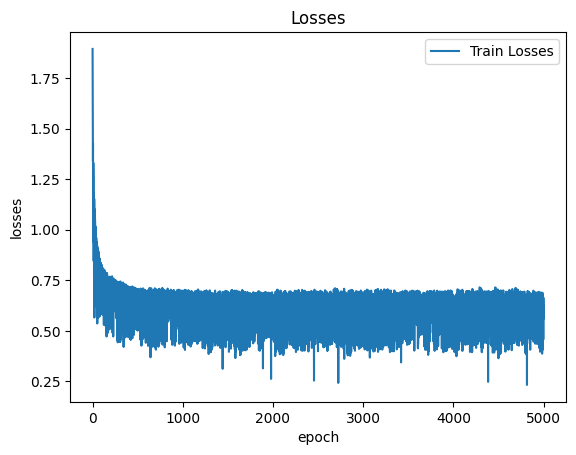

In [23]:
model = LogisticRegression(method="minibatch",alpha=0.0001,l=0.0001)
model.fit(X_resampled,y_resampled)
model.plot()

In [24]:
model.report(X_test,y_test)

=========Classification report=======
Report:
                Precision       Recall          F1-Score        Support        
0               0.82            0.82            0.82            628            
1               0.68            0.61            0.64            750            
2               0.62            0.70            0.66            613            
3               0.78            0.75            0.77            418            

accuracy                                        0.71            2409           
macro avg       0.72            0.72            0.72            2409           
weighted avg    0.72            0.71            0.71            2409           


## experiments

method-minibatch-lr-0.0001-l-0-data-unbalance
---------------------------------------------
generated initial weight
Loss at iteration 0 1.2472866325799636
Loss at iteration 500 0.6995256343297147
Loss at iteration 1000 0.6733307736816694
Loss at iteration 1500 0.6751673344989502
Loss at iteration 2000 0.6391517836953132
Loss at iteration 2500 0.7474290034808603
Loss at iteration 3000 0.630887128146506
Loss at iteration 3500 0.6153019984023825
Loss at iteration 4000 0.6853063378789849
Loss at iteration 4500 0.6719718476636873
time taken: 1355.8387336730957


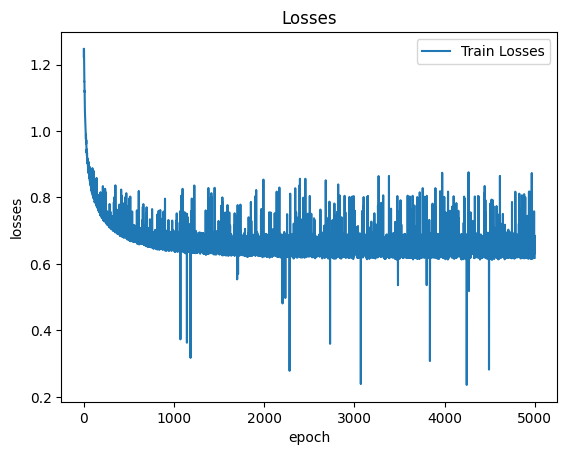

=========Classification report=======
Report:
                Precision       Recall          F1-Score        Support        
0               0.86            0.75            0.80            628            
1               0.63            0.69            0.66            750            
2               0.60            0.66            0.63            613            
3               0.82            0.70            0.75            418            

accuracy                                        0.70            2409           
macro avg       0.73            0.70            0.71            2409           
weighted avg    0.71            0.70            0.70            2409           
method-minibatch-lr-0.0001-l-0-data-SMOTE
-----------------------------------------
generated initial weight
Loss at iteration 0 1.3015235354358694
Loss at iteration 500 0.5833042056172023
Loss at iteration 1000 0.6490839328475025
Loss at iteration 1500 0.6080181675464025
Loss at iteration 2000 0.657001447761034

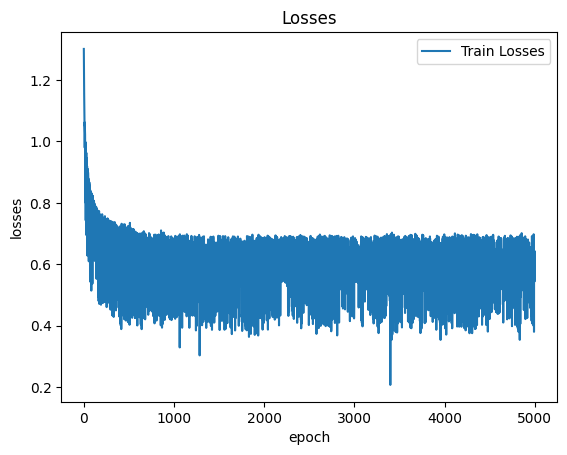

=========Classification report=======
Report:
                Precision       Recall          F1-Score        Support        
0               0.81            0.83            0.82            628            
1               0.68            0.59            0.63            750            
2               0.61            0.71            0.66            613            
3               0.78            0.76            0.77            418            

accuracy                                        0.71            2409           
macro avg       0.72            0.72            0.72            2409           
weighted avg    0.72            0.71            0.71            2409           


c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\ML_env\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


method-minibatch-lr-0.0001-l-0.0001-data-unbalance
--------------------------------------------------
generated initial weight
Loss at iteration 0 1.3418818138295616
Loss at iteration 500 0.6819129925171665
Loss at iteration 1000 0.7719630977499067
Loss at iteration 1500 0.6637117078662097
Loss at iteration 2000 0.6500568756080408
Loss at iteration 2500 0.6419238082244733
Loss at iteration 3000 0.6609044003347077
Loss at iteration 3500 0.6298748402479253
Loss at iteration 4000 0.6301924745013993
Loss at iteration 4500 0.7532376234594979
time taken: 1351.6933085918427


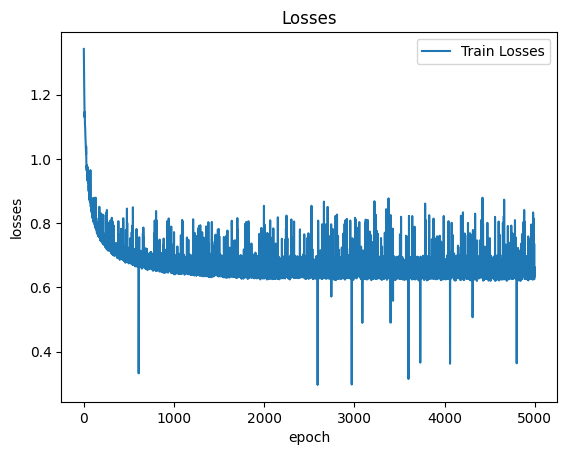

=========Classification report=======
Report:
                Precision       Recall          F1-Score        Support        
0               0.86            0.75            0.80            628            
1               0.63            0.70            0.66            750            
2               0.60            0.66            0.63            613            
3               0.82            0.70            0.75            418            

accuracy                                        0.70            2409           
macro avg       0.73            0.70            0.71            2409           
weighted avg    0.71            0.70            0.71            2409           
method-minibatch-lr-0.0001-l-0.0001-data-SMOTE
----------------------------------------------
generated initial weight
Loss at iteration 0 2.1480339572901848
Loss at iteration 500 0.6688381113740629
Loss at iteration 1000 0.6259919607858129
Loss at iteration 1500 0.5177107013749617
Loss at iteration 2000 0.59105

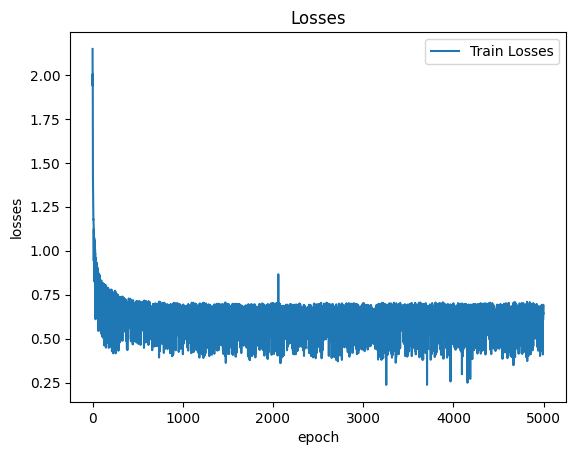

=========Classification report=======
Report:
                Precision       Recall          F1-Score        Support        
0               0.81            0.83            0.82            628            
1               0.68            0.59            0.63            750            
2               0.61            0.71            0.66            613            
3               0.79            0.75            0.77            418            

accuracy                                        0.71            2409           
macro avg       0.72            0.72            0.72            2409           
weighted avg    0.71            0.71            0.71            2409           


In [26]:
datasets = ["unbalance","SMOTE"]
methods = ["minibatch"]
alpha = 0.0001
ls = [0,0.0001]
max_iter = 5000
experiments =[]

for method in methods:

    for l in ls:

        for data in datasets:

            if data == "SMOTE":
                
                X_train_exp = X_resampled.copy()
                y_train_exp = y_resampled.copy()

            else:
                
                X_train_exp = X_train.copy()
                y_train_exp = y_train.copy()                


            params = {"method": method, "alpha": alpha, "l": l,"max_iter":max_iter}


            run_name = f"method-{params['method']}-lr-{params['alpha']}-l-{params['l']}-data-{data}"

            print(run_name)
            print("-"*len(run_name))
                
            mlflow.start_run(run_name=run_name, nested=True)

            mlflow.log_params(params=params)

            model = LogisticRegression(**params,mlflow_log=True)

            model.fit(X_train_exp, y_train_exp)

            f1  = model.f1_score(X_test,y_test)
            wf1  = model.weighted_f1_score(X_test,y_test)
            acc = model.accuracy(X_test,y_test)

            model.plot()

            model.report(X_test,y_test)
            
            mlflow.log_metric(key="accuracy", value=acc)
            mlflow.log_metric(key="weighted-f1-score", value=wf1)
            for i in range(len(np.unique(y_test))):
                mlflow.log_metric(key=f"f1-score-class{i}", value=f1[i])

            signature = mlflow.models.infer_signature(X_train_exp, model.predict(X_train_exp))
            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

            # #######

            mlflow.end_run()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       628
           1       0.68      0.59      0.63       750
           2       0.61      0.71      0.66       613
           3       0.79      0.75      0.77       418

    accuracy                           0.71      2409
   macro avg       0.72      0.72      0.72      2409
weighted avg       0.71      0.71      0.71      2409



### regis the best model

In [29]:
result = mlflow.register_model(
    "runs:/e1a8e909a30b4feda18768312b893441/model", "st123131-a3-model"
)

Successfully registered model 'st123131-a3-model'.
2023/09/19 20:15:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: st123131-a3-model, version 1
Created version '1' of model 'st123131-a3-model'.


### set model's stage

In [30]:
from mlflow import MlflowClient
client = MlflowClient()
client.transition_model_version_stage(
    name="st123131-a3-model", version=1, stage="Staging"
)

<ModelVersion: aliases=[], creation_timestamp=1695129316372, current_stage='Staging', description='', last_updated_timestamp=1695130104440, name='st123131-a3-model', run_id='e1a8e909a30b4feda18768312b893441', run_link='', source='mlflow-artifacts:/619362096066737525/e1a8e909a30b4feda18768312b893441/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>